In [51]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [52]:
original_df = pd.read_excel('./main_df_dropna_completed.xlsx',index_col=0)

In [53]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10900 entries, 0 to 17486
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   회사명                  10900 non-null  object 
 1   거래소코드                10900 non-null  int64  
 2   회계년도                 10900 non-null  int64  
 3   유동비율(%)              10900 non-null  float64
 4   당좌비율(%)              10900 non-null  float64
 5   비유동비율(%)             10900 non-null  float64
 6   부채비율(%)              10900 non-null  float64
 7   유동부채비율(%)            10900 non-null  float64
 8   차입금의존도(%)            10900 non-null  float64
 9   이익잉여금비율(%)           10900 non-null  float64
 10  순운전자본비율(%)           10900 non-null  float64
 11  비유동장기적합률(%)          10900 non-null  float64
 12  이자보상배율(이자비용)(배)      10900 non-null  float64
 13  외화포지션(배)             10900 non-null  float64
 14  총자본순이익률(%)           10900 non-null  float64
 15  자기자본순이익률(%)          10900 non-null  floa

## feature-encoding
    1. '주거래 은행'-> 범주가 19개로 원-핫 X -> get_dummy
    2. '산업위험_경기민감도','k2_부도판단' -> 원-핫

#### 1. 주거래은행 get_dummy 

In [ ]:
encoder = ce.BinaryEncoder(cols=["주거래은행"])

In [54]:
main_df = pd.get_dummies(original_df, columns=['주거래은행'])

#### 2. k2_부실판단, 산업위험_경기민감도 원-핫 인코딩

In [55]:
main_df = main_df.reset_index()

In [56]:
categorical_data = main_df[['K2_부실판단']]

In [57]:
categorical_data = main_df[['K2_부실판단']]
ohe = OneHotEncoder(sparse=False)
ohe_encoded=ohe.fit_transform(categorical_data)
k2_encode = pd.DataFrame(ohe_encoded)

categorical_data = pd.concat([main_df, k2_encode], axis=1)

In [58]:
print(ohe.get_feature_names())

['x0_건전판정' 'x0_부실가능' 'x0_판정보류']


In [59]:
# '산업위험_경기민감도' 컬럼 선택
categorical_data_2 = main_df[['산업위험_경기민감도','K2_score']]

# OneHotEncoder 객체 생성 및 학습
ohe_2 = OneHotEncoder(sparse=False)
ohe_2.fit(categorical_data_2)

# One-Hot-Encoding 적용
ohe_encoded_2 = ohe_2.transform(categorical_data_2)

# 인코딩된 데이터를 DataFrame으로 변환
industry_encode = pd.DataFrame(ohe_encoded_2)

# 원본 DataFrame과 원핫 인코딩된 데이터를 합침
categorical_data = pd.concat([categorical_data, industry_encode], axis=1)


In [60]:
print(ohe_2.get_feature_names())

['x0_A' 'x0_AA' 'x0_B' 'x0_BB' 'x0_BBB']


In [61]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                10900 non-null  int64  
 1   회사명                  10900 non-null  object 
 2   거래소코드                10900 non-null  int64  
 3   회계년도                 10900 non-null  int64  
 4   유동비율(%)              10900 non-null  float64
 5   당좌비율(%)              10900 non-null  float64
 6   비유동비율(%)             10900 non-null  float64
 7   부채비율(%)              10900 non-null  float64
 8   유동부채비율(%)            10900 non-null  float64
 9   차입금의존도(%)            10900 non-null  float64
 10  이익잉여금비율(%)           10900 non-null  float64
 11  순운전자본비율(%)           10900 non-null  float64
 12  비유동장기적합률(%)          10900 non-null  float64
 13  이자보상배율(이자비용)(배)      10900 non-null  float64
 14  외화포지션(배)             10900 non-null  float64
 15  총자본순이익률(%)           10900 non-null 

In [62]:
categorical_data.drop(labels=['산업위험_경기민감도','K2_score','K2_부실판단','매출액(수익)(천원)'],axis=1,inplace=True)

In [63]:
categorical_data.columns

Index([              'index',                 '회사명',               '거래소코드',
                      '회계년도',             '유동비율(%)',             '당좌비율(%)',
                  '비유동비율(%)',             '부채비율(%)',           '유동부채비율(%)',
                 '차입금의존도(%)',          '이익잉여금비율(%)',          '순운전자본비율(%)',
               '비유동장기적합률(%)',     '이자보상배율(이자비용)(배)',            '외화포지션(배)',
                '총자본순이익률(%)',         '자기자본순이익률(%)',         '경영자본순이익률(%)',
                '매출액순이익률(%)',       '총자본정상영업이익률(%)',      '자기자본정상영업이익률(%)',
             '매출액정상영업이익률(%)',          '금융비용부담률(%)',           '총자산회전율(배)',
                '매출채권회전률(배)',          '당좌자산회전률(배)',          '재고자산회전률(배)',
                '유형자산회전율(배)',          '매입채무회전률(배)',          '자기자본회전률(배)',
                '경영자본회전률(배)',          '유동자산증가율(%)',           '매출액증가율(%)',
              '정상영업이익증가율(%)',           '순이익증가율(%)',           'spread(%)',
               'PPI(2015기준)',         '실질GDP성장률(%)',        'EV/EBITDA(배)',
            

In [64]:
categorical_data.columns = [ 'index',                 '회사명',               '거래소코드',
                      '회계년도',             '유동비율(%)',             '당좌비율(%)',
                  '비유동비율(%)',             '부채비율(%)',           '유동부채비율(%)',
                 '차입금의존도(%)',          '이익잉여금비율(%)',          '순운전자본비율(%)',
               '비유동장기적합률(%)',     '이자보상배율(이자비용)(배)',            '외화포지션(배)',
                '총자본순이익률(%)',         '자기자본순이익률(%)',         '경영자본순이익률(%)',
                '매출액순이익률(%)',       '총자본정상영업이익률(%)',      '자기자본정상영업이익률(%)',
             '매출액정상영업이익률(%)',          '금융비용부담률(%)',           '총자산회전율(배)',
                '매출채권회전률(배)',          '당좌자산회전률(배)',          '재고자산회전률(배)',
                '유형자산회전율(배)',          '매입채무회전률(배)',          '자기자본회전률(배)',
                '경영자본회전률(배)',          '유동자산증가율(%)',           '매출액증가율(%)',
              '정상영업이익증가율(%)',           '순이익증가율(%)',           'spread(%)',
               'PPI(2015기준)',         '실질GDP성장률(%)',        'EV/EBITDA(배)',
                  '52주베타(배)',                 'PER',                 'PBR',
                       'PCR', 'CASH FLOW 대 부채비율(%)',          '총자본투자효율(%)',
                 'log_평균총자산',    '최대주주특수관계인_지분율(%)',         '최대주주변경횟수(회)',
               '감사법인변경횟수(회)',               '업력(년)',           '평균근속연수(년)',
                 '직원수증감율(%)',            '기간제비율(%)',           'R&D집중도(%)',
             '수출기업여부(dummy)',              'Target',       '주거래은행_BNK경남은행',
             '주거래은행_BNK부산은행',       '주거래은행_DGB대구은행',       '주거래은행_IBK기업은행',
             '주거래은행_KDB산업은행',       '주거래은행_KEB하나은행',          '주거래은행_NH농협',
              '주거래은행_SC제일은행',          '주거래은행_광주은행',          '주거래은행_국민은행',
                  '주거래은행_수협',          '주거래은행_시티은행',          '주거래은행_신한은행',
                '주거래은행_우리은행',          '주거래은행_전북은행',       '주거래은행_한국수출입은행',
         '주거래은행_한국스탠다드차타드은행',        '주거래은행_한국씨티은행','K2_건전판정', 'K2_부실가능' ,'K2_판정보류',
                                  '경기민감_A', '경기민감_AA' ,'경기민감_B', '경기민감_BB', '경기민감_BBB']

### train_test_split

In [65]:
df_train = categorical_data.loc[categorical_data['회계년도'] <= 2019]
df_test = categorical_data.loc[categorical_data['회계년도'] > 2019]

In [66]:
X_train = df_train.drop(['Target','회사명', '거래소코드', '회계년도'], axis=1)
y_train = df_train['Target']

X_test = df_test.drop(['Target','회사명', '거래소코드', '회계년도'],axis=1)
y_test = df_test['Target']

In [67]:
upper_cutoff = np.percentile(X_train['R&D집중도(%)'], 99)
lower_cutoff = np.percentile(X_train['R&D집중도(%)'], 1)

In [68]:
data_winsorized = np.clip(X_train['R&D집중도(%)'], lower_cutoff, upper_cutoff)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 10896
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                7372 non-null   int64  
 1   유동비율(%)              7372 non-null   float64
 2   당좌비율(%)              7372 non-null   float64
 3   비유동비율(%)             7372 non-null   float64
 4   부채비율(%)              7372 non-null   float64
 5   유동부채비율(%)            7372 non-null   float64
 6   차입금의존도(%)            7372 non-null   float64
 7   이익잉여금비율(%)           7372 non-null   float64
 8   순운전자본비율(%)           7372 non-null   float64
 9   비유동장기적합률(%)          7372 non-null   float64
 10  이자보상배율(이자비용)(배)      7372 non-null   float64
 11  외화포지션(배)             7372 non-null   float64
 12  총자본순이익률(%)           7372 non-null   float64
 13  자기자본순이익률(%)          7372 non-null   float64
 14  경영자본순이익률(%)          7372 non-null   float64
 15  매출액순이익률(%)           7372 non-null   float

###모델링

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [71]:
# 모델 함수
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    
    for clf in models:
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred),2),
                    round(precision_score(y_test, pred),2),
                    round(recall_score(y_test, pred),2),
                    round(f1_score(y_test, pred),2))
        rdict['model'].append(clf); 
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

        # print(results)

    rdf = pd.DataFrame(data=rdict)
    return rdf 

In [72]:
model_basic(X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 672, number of negative: 6700
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11591
[LightGBM] [Info] Number of data points in the train set: 7372, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091156 -> initscore=-2.299604
[LightGBM] [Info] Start training from score -2.299604


,model,accuracy,precision,recall,f1_score
0,DecisionTreeClassifier(),0.89,0.32,0.55,0.40
1,"(DecisionTreeClassifier(max_features='auto', r...",0.93,0.48,0.43,0.45
2,"XGBClassifier(base_score=None, booster=None, c...",0.93,0.50,0.54,0.52
3,LGBMClassifier(),0.93,0.49,0.49,0.49


In [73]:
result_df = model_basic(X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 672, number of negative: 6700
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11591
[LightGBM] [Info] Number of data points in the train set: 7372, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091156 -> initscore=-2.299604
[LightGBM] [Info] Start training from score -2.299604


In [74]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


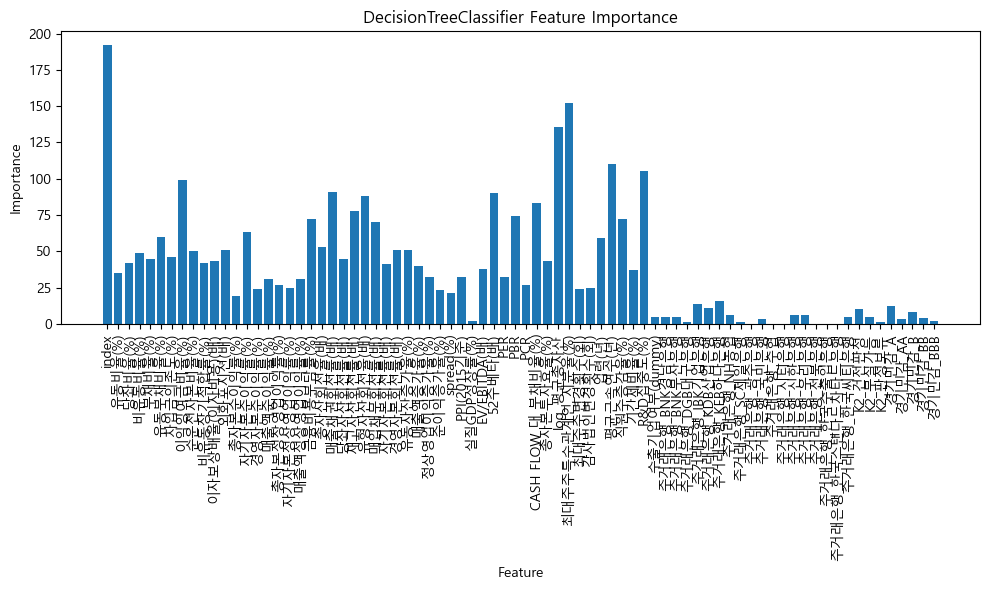

In [75]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

dt_clf = result_df['model'][3]  # DecisionTreeClassifier 모델 선택
feature_importance = dt_clf.feature_importances_

# 각 feature의 중요도를 그래프로 표현
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X_train.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.tight_layout()
plt.show()

In [76]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(result_df['model'][0] , scoring = "f1", random_state = 42).fit(X_train, y_train)
eli5.show_weights(perm, top = 80, feature_names = X_train.columns.tolist())

Weight,Feature
0.3509 ± 0.0101,매출액순이익률(%)
0.3085 ± 0.0035,자기자본순이익률(%)
0.2501 ± 0.0112,경영자본순이익률(%)
0.1702 ± 0.0103,K2_부실가능
0.1506 ± 0.0157,최대주주특수관계인_지분율(%)
0.1166 ± 0.0052,52주베타(배)
0.1157 ± 0.0150,매출액정상영업이익률(%)
0.1030 ± 0.0132,총자본정상영업이익률(%)
0.1014 ± 0.0169,CASH FLOW 대 부채비율(%)
0.0982 ± 0.0077,자기자본정상영업이익률(%)


In [77]:
import shap 

In [78]:
shap.initjs()

explainer = shap.TreeExplainer(result_df['model'][1])
shap_values = explainer.shap_values(X_train)

KeyboardInterrupt: 

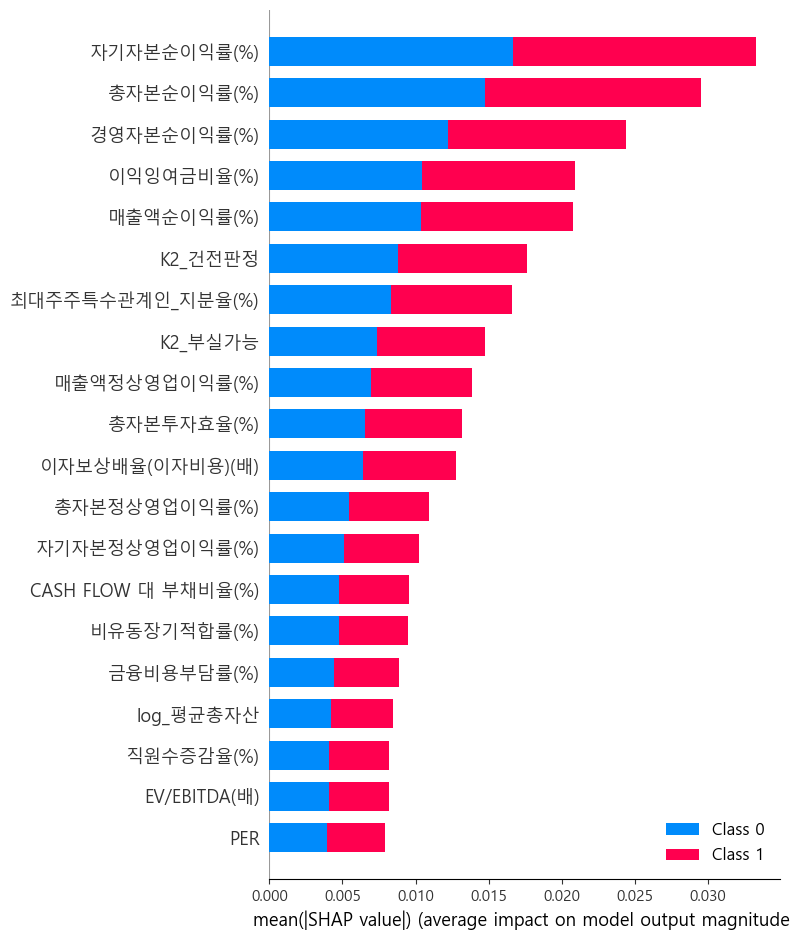

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [ ]:
shap.plots.beeswarm(shap_values)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.